In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("sales_data.csv")
df.head()


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [ ]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [ ]:
df.isnull().sum()


,0
Product_ID,0
Sale_Date,0
Sales_Rep,0
Region,0
Sales_Amount,0
Quantity_Sold,0
Product_Category,0
Unit_Cost,0
Unit_Price,0
Customer_Type,0


In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)



In [ ]:
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])


In [ ]:
df['Month'] = df['Sale_Date'].dt.month
df['Year'] = df['Sale_Date'].dt.year


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product_ID            1000 non-null   int64         
 1   Sale_Date             1000 non-null   datetime64[ns]
 2   Sales_Rep             1000 non-null   object        
 3   Region                1000 non-null   object        
 4   Sales_Amount          1000 non-null   float64       
 5   Quantity_Sold         1000 non-null   int64         
 6   Product_Category      1000 non-null   object        
 7   Unit_Cost             1000 non-null   float64       
 8   Unit_Price            1000 non-null   float64       
 9   Customer_Type         1000 non-null   object        
 10  Discount              1000 non-null   float64       
 11  Payment_Method        1000 non-null   object        
 12  Sales_Channel         1000 non-null   object        
 13  Region_and_Sales_Re

,Product_ID,Sale_Date,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount,Month,Year
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,1050.128000,2023-07-02 17:42:43.199999744,5019.265230,25.355000,2475.304550,2728.440120,0.15239,6.50600,2023.003000
min,1001.000000,2023-01-01 00:00:00,100.120000,1.000000,60.280000,167.120000,0.00000,1.00000,2023.000000
25%,1024.000000,2023-03-30 00:00:00,2550.297500,13.000000,1238.380000,1509.085000,0.08000,3.00000,2023.000000
50%,1051.000000,2023-06-30 12:00:00,5019.300000,25.000000,2467.235000,2696.400000,0.15000,6.00000,2023.000000
75%,1075.000000,2023-10-12 00:00:00,7507.445000,38.000000,3702.865000,3957.970000,0.23000,10.00000,2023.000000
max,1100.000000,2024-01-01 00:00:00,9989.040000,49.000000,4995.300000,5442.150000,0.30000,12.00000,2024.000000
std,29.573505,NaN,2846.790126,14.159006,1417.872546,1419.399839,0.08720,3.54154,0.054717


In [ ]:
region_sales = df.groupby('Region')['Sales_Amount'].sum().sort_values(ascending=False)
region_sales


,Sales_Amount
Region,
North,1369612.51
East,1259792.93
West,1235608.93
South,1154250.86


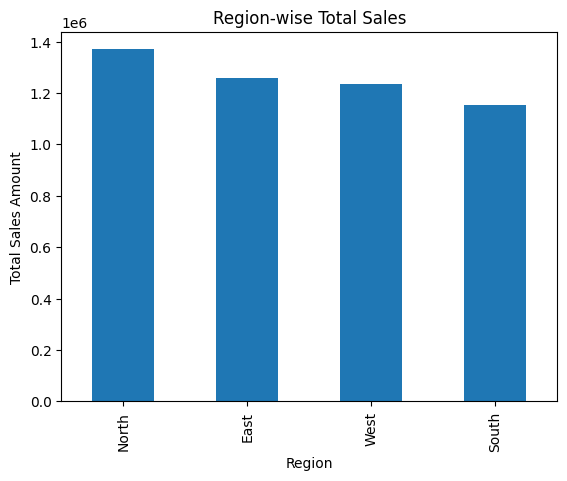

In [ ]:
import matplotlib.pyplot as plt

region_sales.plot(kind='bar', title='Region-wise Total Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.show()


In [ ]:
category_sales = df.groupby('Product_Category')['Sales_Amount'].sum().sort_values(ascending=False)
category_sales


,Sales_Amount
Product_Category,
Clothing,1313474.36
Furniture,1260517.69
Electronics,1243499.64
Food,1201773.54


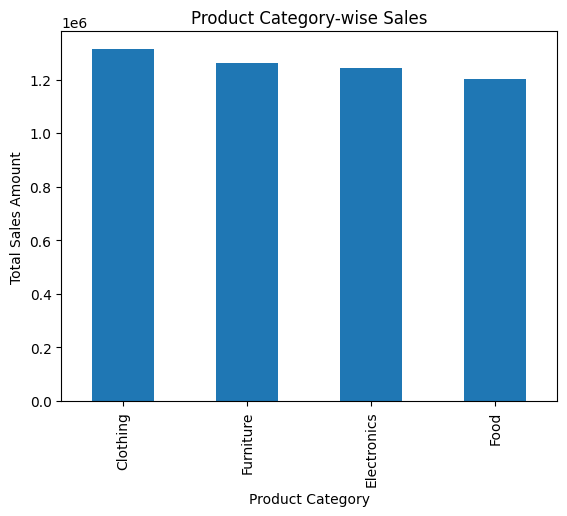

In [ ]:
category_sales.plot(kind='bar', title='Product Category-wise Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()


In [ ]:
region_quantity = df.groupby('Region')['Quantity_Sold'].sum().sort_values(ascending=False)
region_quantity


,Quantity_Sold
Region,
North,6705
West,6486
East,6356
South,5808


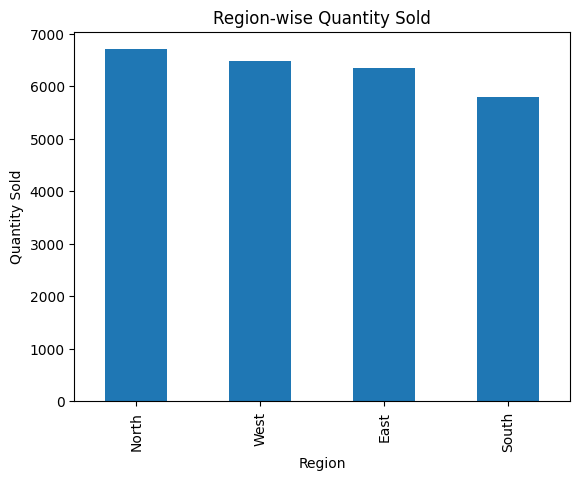

In [ ]:
region_quantity.plot(kind='bar', title='Region-wise Quantity Sold')
plt.xlabel('Region')
plt.ylabel('Quantity Sold')
plt.show()


In [ ]:
customer_sales = df.groupby('Customer_Type')['Sales_Amount'].sum()
customer_sales


,Sales_Amount
Customer_Type,
New,2506258.30
Returning,2513006.93


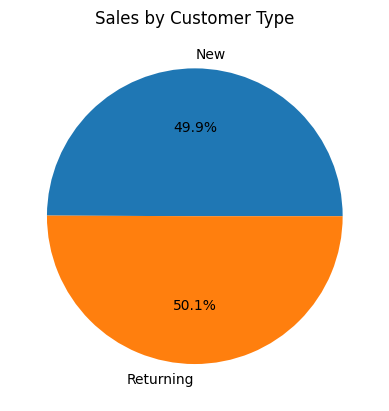

In [ ]:
customer_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Customer Type')
plt.ylabel('')
plt.show()


In [ ]:
channel_sales = df.groupby('Sales_Channel')['Sales_Amount'].sum()
channel_sales


,Sales_Amount
Sales_Channel,
Online,2458833.93
Retail,2560431.30
